# Loan Approval Classification

### Data Cleaning

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/loan_data.csv')

data['person_gender'] = data['person_gender'].map({'female': 0, 'male': 1})
data['person_education'] = data['person_education'].map({'Master': 0, 'High School': 1, 'Bachelor': 2, 'Associate': 3, 'Doctorate': 4})
data['person_home_ownership'] = data['person_home_ownership'].map({'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3})
data['loan_intent'] = data['loan_intent'].map({'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5})
data['person_age'] = data['person_age'].astype(int)
data['cb_person_cred_hist_length'] = data['cb_person_cred_hist_length'].astype(int)
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

print(f"Shape: {data.shape}")
data.head()

Shape: (45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,0,0,71948.0,0,0,35000.0,0,16.02,0.49,3,561,0,1
1,21,0,1,12282.0,0,1,1000.0,1,11.14,0.08,2,504,1,0
2,25,0,1,12438.0,3,2,5500.0,2,12.87,0.44,3,635,0,1
3,23,0,2,79753.0,0,0,35000.0,2,15.23,0.44,2,675,0,1
4,24,1,0,66135.0,1,0,35000.0,2,14.27,0.53,4,586,0,1


### Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data.drop('loan_status', axis=1)
y = data['loan_status']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.15, random_state=42)

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

### Model Structure

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(256, activation='relu', input_shape=(13,)),
    BatchNormalization(),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
])

/home/pi/Code/loan-approval-classification/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling and Early Stopping

In [4]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
    )

In [5]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
    )

### Model Training

In [6]:
history = model.fit(
    train_X, train_y,
    validation_data=(test_X, test_y),
    epochs=22,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/22
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8140 - loss: 0.4121 - val_accuracy: 0.8776 - val_loss: 0.2735
Epoch 2/22
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8943 - loss: 0.2391 - val_accuracy: 0.9027 - val_loss: 0.2226
Epoch 3/22
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8969 - loss: 0.2259 - val_accuracy: 0.9037 - val_loss: 0.2145
Epoch 4/22
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8983 - loss: 0.2230 - val_accuracy: 0.9041 - val_loss: 0.2128
Epoch 5/22
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9020 - loss: 0.2178 - val_accuracy: 0.9056 - val_loss: 0.2094
Epoch 6/22
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9006 - loss: 0.2186 - val_accuracy: 0.9049 - val_loss: 0.2090
Epoch 7/22
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9048 - loss: 0.2092 - val_accuracy: 0.9083 - val_loss: 0.2049
Epoch 8/22
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9045 - loss: 0.2095 - val_accuracy: 0.

### Outcome Visualization

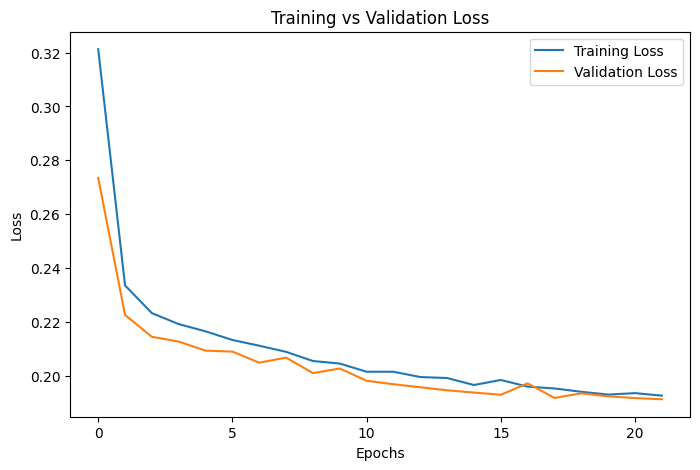

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [8]:
print(f"Most Recent Training Accuracy: {history.history['accuracy'][-1] * 100}%")
print(f"Most Recent Validation Accuracy: {history.history['val_accuracy'][-1] * 100}%")

Most Recent Training Accuracy: 91.27058982849121%
Most Recent Validation Accuracy: 91.55555367469788%


### Save Model

In [9]:
import pickle

model.save("model/model.keras")
with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)